**Evaluation of Test Classification**



create our arbitrary data using the sklearn make_classification method

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

print(pd.DataFrame(X))
print(pd.Series(y))

           0         1         2         3         4         5         6   \
0   -0.258203  1.019808  1.524563  0.617243  0.148243  0.744111 -0.363963   
1   -0.458166  0.828728 -0.656965 -0.056297  0.254895 -0.018241  0.313829   
2   -0.387378  0.761818 -1.310351 -0.351663 -0.130643 -0.641420  0.152001   
3   -2.394585 -0.036724  1.361228 -0.371470  1.871835 -1.226815  0.770733   
4    0.258229 -1.600952  1.101282  1.659578  0.927923 -0.093182 -1.778309   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.724879  0.281545 -0.362035 -2.602418  0.699501 -0.328376  0.383521   
996  2.085897  0.461640  0.372497 -1.838814  0.024923 -0.710831 -0.945424   
997 -0.547793 -0.674539 -0.834644  1.050191 -0.797763  0.699879 -0.943583   
998  0.559619 -0.625025  1.404538  0.593826 -0.270234 -0.519678 -1.407141   
999 -1.424876  0.527146  0.157864 -0.926648 -0.801353  1.825411  0.999557   

           7         8         9         10        11        12        13  

Performing the test classification on two classifiers

Logistic Regression

K neighbor Classification


In [2]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

Sklearn has a very potent method, roc_curve(), which computes the ROC for your classifier in a matter of seconds! It returns the FPR, TPR, and threshold values:

In [3]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

The AUC score can be computed using the roc_auc_score() method of sklearn

In [4]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


In [5]:
# auc roc curve

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)



# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

<ipython-input-6-3bd2c42a5469>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


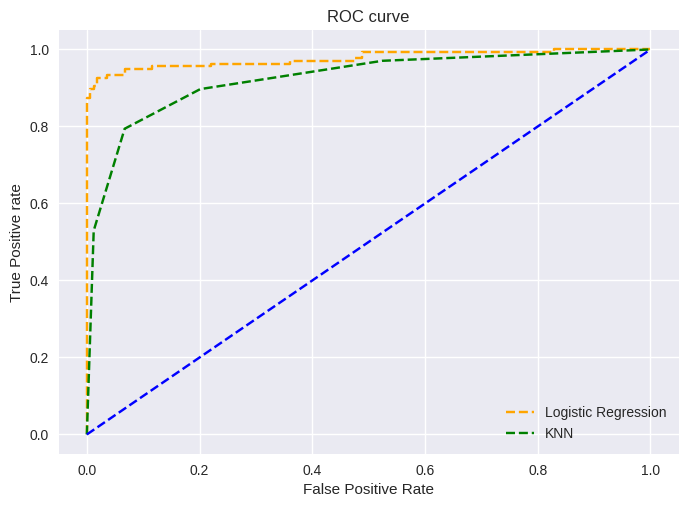

In [6]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**Inference:**

It is evident from the plot that the AUC for the Logistic Regression ROC curve is higher than that for the KNN ROC curve. Therefore, we can say that logistic regression did a better job of classifying the positive class in the dataset

**Multi-class classification model**

If we have three classes, 0, 1, and 2, the ROC for class 0 will be generated as classifying 0 against not 0, i.e., 1 and 2.

The ROC for class 1 will be generated as classifying 1 against not 1, and so on.

The ROC curve for multi-class classification models.

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

<ipython-input-4-82c0c3a5262e>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


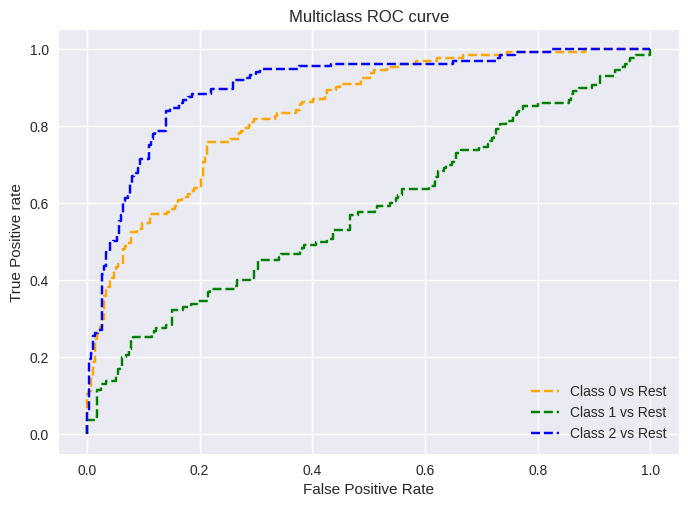

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

[link text](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/)